# Mi primer cuaderno
## Este es mi primer cuaderno en Jupyter
### Vamos hacer una aplicación con machine learning para clasificación


In [2]:
# Primera fase visualizo los datos de mi data set 

from sklearn.datasets import load_iris
import pandas as pd

iris_dataset = load_iris()

# Creamos un dataframe de los datos de flores.
# Etiquetamos las columnas usando las cadenas de iris_dataset.feature_names (nombres de las caracteristicas).
# iris_dataset['data'] son los datos. 
iris_dataframe = pd.DataFrame(iris_dataset['data'], columns = iris_dataset.feature_names)

# Creo una nueva columna 'target' (objetivo) en el DataFrame con los valores de iris_dataset['target'].
iris_dataframe['target'] = iris_dataset['target']

# Cambio los valores de la columna 'target' por 'setosa',etc.
iris_dataframe.loc[iris_dataframe.target == 0,'target']=iris_dataset['target_names'][0]#'setosa'
iris_dataframe.loc[iris_dataframe.target == 1,'target']=iris_dataset['target_names'][1]#'versicolor'
iris_dataframe.loc[iris_dataframe.target == 2,'target']=iris_dataset['target_names'][2]#'virginica'

# Cambio el nombre del titulo de la columna 'target' por 'species'.
iris_dataframe = iris_dataframe.rename(columns={'target':'species'})

# Datos estadisticos de los datos de iris_dataframe.
iris_describe = iris_dataframe.describe()
print('Datos estadisticos de iris_dataframe:\n')
print(f'{iris_describe}')
print('')

# Datos setosa
setosa_dataframe = iris_dataframe[iris_dataframe.species=="setosa"] # DF solo de setosa
setosa_describe = setosa_dataframe.describe()
print('Datos estadisticos de setosa_dataframe:\n')
print(f'{setosa_describe}')

Datos estadisticos de iris_dataframe:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Datos estadisticos de setosa_dataframe:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         5

### Graficamos la relación entre múltiples variables.

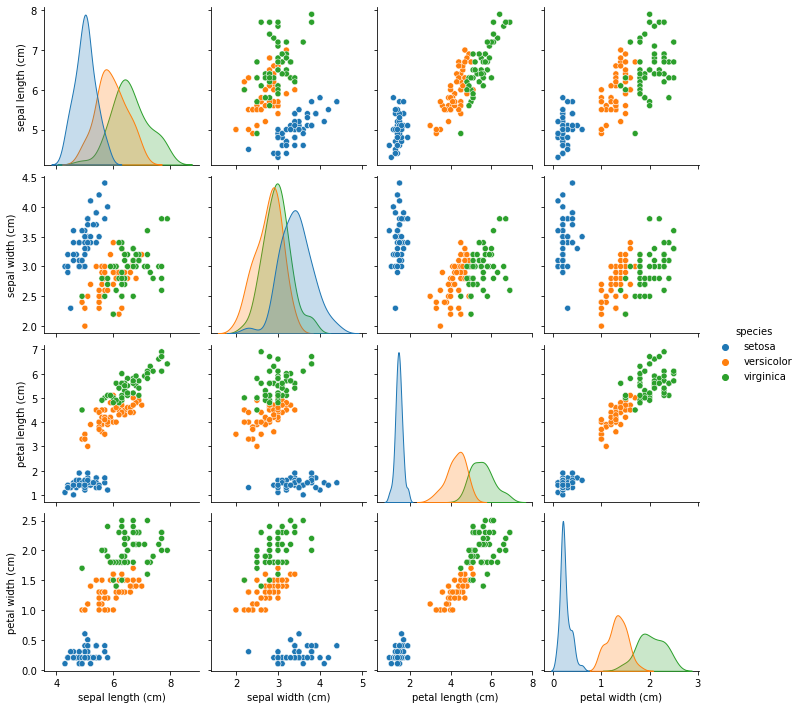

In [6]:
import seaborn as sns

# Todo:
sns.pairplot(data = iris_dataframe, hue='species')

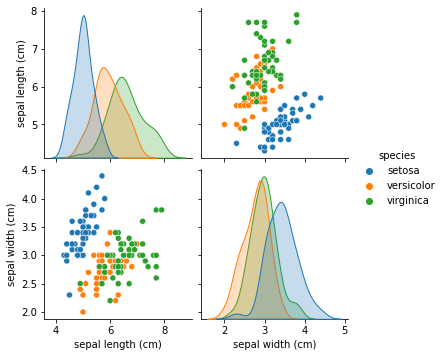

In [3]:
# Parte:
sns.pairplot(data = iris_dataframe ,vars =['sepal length (cm)','sepal width (cm)'], hue='species')

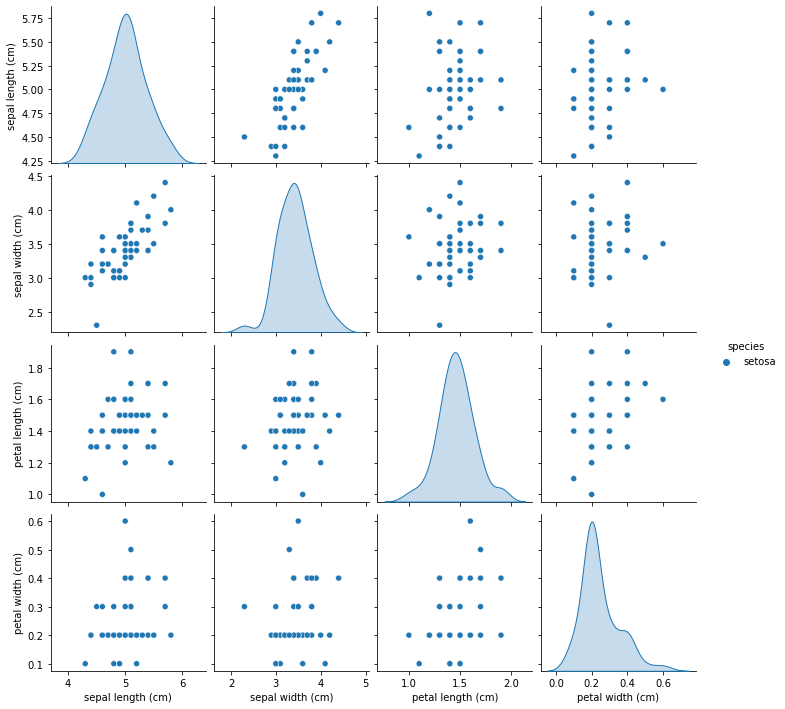

In [4]:
# Setosa
sns.pairplot(data = setosa_dataframe, hue='species')

### Eleccion del modelo y busqueda de hiperparametros.

La validación cruzada se puede utilizar para comparar los resultados de diferentes procedimientos de clasificación predictiva. Por ejemplo, supongamos que tenemos un detector que nos determina si una cara pertenece a una mujer o a un hombre y consideramos que han sido utilizados dos métodos diferentes, por ejemplo, máquinas de vectores de soporte (SVM) y K-vecinos más cercanos (Knn), ya que ambos nos permiten clasificar las imágenes. Con la validación cruzada podríamos comparar los dos procedimientos y determinar cuál de los dos es el más preciso. 

busqueda de cuadricula: un método de ajuste de hiperparametro; búsqueda exhaustiva: entre todas las selecciones de parámetros candidatos, a través de bucles y probando todas las posibilidades, el parámetro de mejor rendimiento es el resultado final. 

In [3]:
# Segunda fase, busqueda de cuadricula y validacion cruzada para ello usamos la clases
# GridSearchCv

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Modelo menos complejo un parametro (hiperparametro)
param_grid_kn = {'n_neighbors':[1,3,9]}
print("Parameter grid KNC:\n{}".format(param_grid_kn))  

grid_search_kn = GridSearchCV(KNeighborsClassifier(), param_grid_kn, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target, random_state=0)

# Lo importante aqui es que no usamos el conjunto de prueba (X_test,y_test) para 
# elegir los parametros.
grid_search_kn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_kn.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_kn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_kn.best_score_))
print(" ")

# Modelo mas complejo dos parametros (hiperparametro)
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid SVC:\n{}".format(param_grid_svc))  

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)

# X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target, random_state=0)

# Lo importante aqui es que no usamos el conjunto de prueba (X_test,y_test) para 
# elegir los parametros.
grid_search_svc.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_svc.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_))

Parameter grid KNC:
{'n_neighbors': [1, 3, 9]}
Test set score: 0.97
Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.96
 
Parameter grid SVC:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


De acuerdo con los resultados Best cross-validadtion score nos quedamos con el modelo SVC. El mejore resultado (Test set score) obtenido por el modelo SVC es aquel que usa los siguientes hiperparametros C:10 y gamma:0.1. En si los dos modelos andan muy bien para estos datos.

### Análisis del resultado de la validacion cruzada

Los resultados de una busqueda en cuadricula se pueden encontrar en el atributo cv_results_.

[Text(0.5, 1.0, 'the mean cross-validation scores'),
 Text(33.0, 0.5, 'C'),
 Text(0.5, 15.0, 'gamma')]

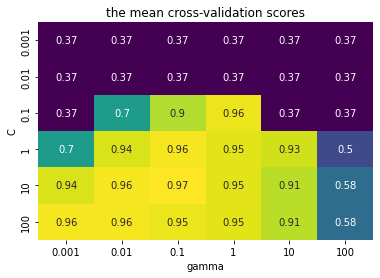

In [7]:
# Tercera fase analisis del resultado

import numpy as np

# Convertir a DataFrame
results = pd.DataFrame(grid_search_svc.cv_results_)

# Mostrar las pimeras 5 filas
results.head()

scores = np.array(results.mean_test_score).reshape(6, 6)

scores = pd.DataFrame(scores)

ax = sns.heatmap(scores, annot = True,cmap="viridis",cbar=0,xticklabels=param_grid_svc['gamma'],yticklabels=param_grid_svc['C'])

ax.set(title='the mean cross-validation scores', ylabel='C',xlabel='gamma')

Cada punto en el mapa de color corresponde a una ejecucion de validación cruzada, con una configuracion de parametro particular. El color nos dice la precisión de la validación cruzada; los colores claros significa alta precisión. De esto sale que el modelo SVC es muy sensible a la configuración de los parametros. 

### Matriz de confusion

In [8]:
# Matriz de confusion: una de las formas mas completa de representar el resultado 
# de evaluar la clasificacion.

from sklearn.metrics import confusion_matrix

svc = SVC(C=10,gamma=0.1).fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(f'score:{svc.score(X_test,y_test):.2f}')

# La diagonal principal de la matriz de confusion corresponde a las clasificaciones correctas,
# mientras que las otras entradas nos dicen cuantas muestras de una clase se clasificaron por
# error como otra clase. 
confusion = confusion_matrix(y_test, pred_svc)
print(f'matriz de confusion:\n {confusion}')

score:0.97
matriz de confucion:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


### Presición

In [15]:
# Accuracy

diagonal = np.trace(confusion) # suma de los elementos de la diagonal principal de la matriz de confusion
total_matriz = np.sum(confusion) # suma de todos los elementos de la matriz de confusion
accuracy = diagonal/total_matriz
print(f'precisión:\n{accuracy:.2f}')

precisión:
0.97


En otras palabras, la precisión es el número de predicciones correctas (elementos de la diagonal principal de la matriz) 
dividido por el total de todas las muestras (todos los elementos de la matriz).